In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
plt.style.use('seaborn-v0_8')

In [104]:
datasets_map = {
    "red_team_chat": "Red Team",
    "full_chat":"Help/Harm",
    "xsum":"XSum",
}

methods_map = {
    "LttHB": "LTT",
    "RcpsWSR": "RCPS",
    'DKWBonferroni': "DKW", 
    'OrderStatsBonferroni': "Order Stats", 
    'KS': "QRC (KS)",
    'BJ': "QRC (BJ)",
    'One-sided-BJ': "QRC (1-BJ)",
    'Two-sided-BJ': "QRC (2-BJ)",
}

method_order = list(methods_map.keys())

In [117]:
def run_exp(
    dataset = "red_team_chat",
    loss_fn = "toxicity",
    measure = "Mean",
    beta_lo = 0.0,
    beta_hi = 1.0,
    no_data = 1000,
    grid_size = 100
):
    if measure == "VaR-Int" or measure == "CVaR":
        exp_name = "{}_{}_beta_lo_{}_beta_hi_{}_no_data_{}_grid_size_{}_full_results".format(
            dataset, 
            loss_fn, 
            beta_lo,
            beta_hi,
            no_data, 
            grid_size
        )
        root = "../output/{}/{}.csv".format(
            dataset, 
            exp_name
        )
        bound_col = "guaranteed_auc"
        emp_col = "empirical_auc"
        
    elif measure == "Mean":
        exp_name = "{}_{}_mean_no_data_{}_full_results".format(
            dataset, 
            loss_fn, 
            no_data, 
        )
        root = "../output/{}/{}.csv".format(
            dataset, 
            exp_name
        )
        bound_col = "alpha"
        emp_col = "mean loss"
    else:
        raise ValueError

    print("Experiment:", exp_name)

    df = pd.read_csv(root)
    methods = list(set(df["method"].tolist()))

    all_bounds = []
    all_emps = []
    labels = []

    method_tuples = [(method_order.index(mtd), mtd) for mtd in methods]
    methods = [t[1] for t in sorted(method_tuples)]
    
    for mtd in methods:

        if ("DKW" in mtd) or ("KS" in mtd):
            continue
        
        mtd_df = df[df["method"] == mtd]
        bounds = mtd_df[bound_col].tolist()
        emps = mtd_df[emp_col].tolist()

        all_bounds.append(bounds)
        all_emps.append(emps)
        labels.append(methods_map[mtd])

    pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
    plt.rcParams["figure.figsize"] = [5,3]
    plt.boxplot(
        all_bounds,
        labels=labels,
        patch_artist = True,
        boxprops = dict(
            facecolor = pal[0], 
            alpha=0.5
        ),
        medianprops = dict(
            color = "k", 
        )
    )
    plt.boxplot(
        all_emps,
        labels=labels,
        patch_artist = True,
        boxprops = dict(
            facecolor = pal[2], 
            alpha=0.5
        ),
        medianprops = dict(
            color = "k", 
        )
    )
    plt.ylabel(measure + " Bound", fontsize=16)
    plt.title(datasets_map[dataset], fontsize=18)
    plt.savefig("../plots/{}/{}.png".format(dataset, exp_name), bbox_inches="tight")
    plt.show()
        


Experiment: red_team_chat_toxicity_mean_no_data_1000_full_results


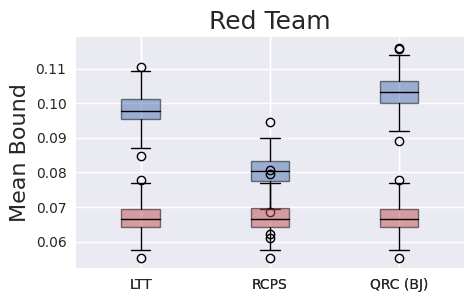

Experiment: full_chat_toxicity_mean_no_data_1000_full_results


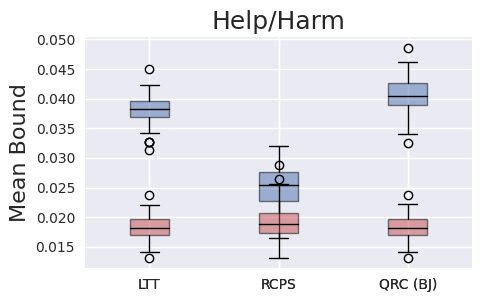

Experiment: xsum_bertscore_mean_no_data_1000_full_results


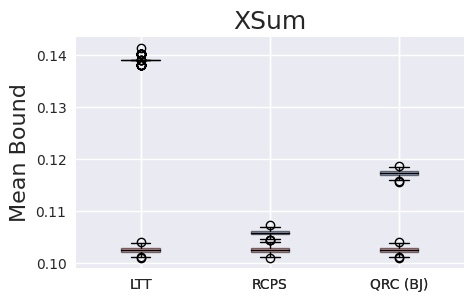

In [122]:
run_exp(
    dataset = "red_team_chat",
    loss_fn = "toxicity",
    measure = "Mean",
)

run_exp(
    dataset = "full_chat",
    loss_fn = "toxicity",
    measure = "Mean",
)

run_exp(
    dataset = "xsum",
    loss_fn = "bertscore",
    measure = "Mean",
)

Experiment: red_team_chat_toxicity_beta_lo_0.75_beta_hi_1.0_no_data_1000_grid_size_100_full_results


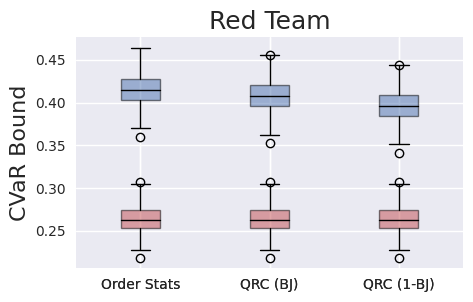

Experiment: full_chat_toxicity_beta_lo_0.75_beta_hi_1.0_no_data_1000_grid_size_100_full_results


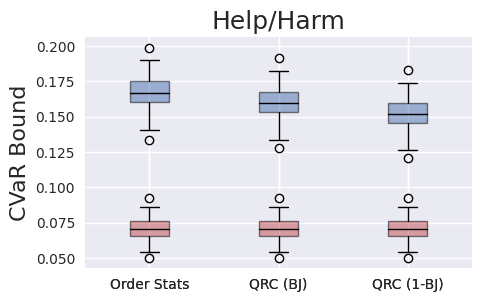

Experiment: xsum_bertscore_beta_lo_0.75_beta_hi_1.0_no_data_1000_grid_size_100_full_results


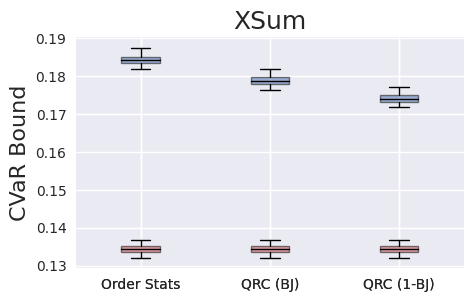

In [123]:
run_exp(
    dataset = "red_team_chat",
    loss_fn = "toxicity",
    measure = "CVaR",
    beta_lo = 0.75,
    beta_hi = 1.0,
)

run_exp(
    dataset = "full_chat",
    loss_fn = "toxicity",
    measure = "CVaR",
    beta_lo = 0.75,
    beta_hi = 1.0,
)

run_exp(
    dataset = "xsum",
    loss_fn = "bertscore",
    measure = "CVaR",
    beta_lo = 0.75,
    beta_hi = 1.0,
)

Experiment: red_team_chat_toxicity_beta_lo_0.75_beta_hi_0.95_no_data_1000_grid_size_100_full_results


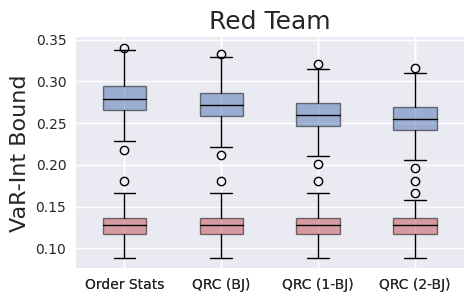

Experiment: full_chat_toxicity_beta_lo_0.75_beta_hi_0.95_no_data_1000_grid_size_100_full_results


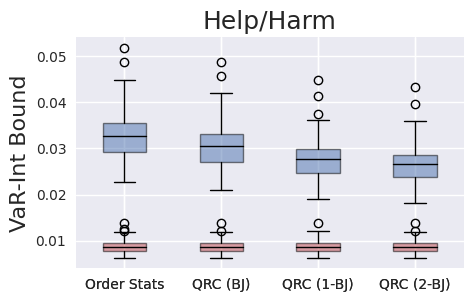

Experiment: xsum_bertscore_beta_lo_0.75_beta_hi_0.95_no_data_1000_grid_size_100_full_results


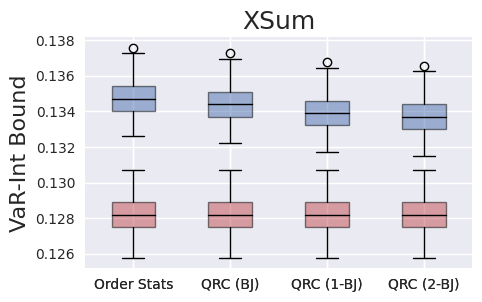

In [125]:
run_exp(
    dataset = "red_team_chat",
    loss_fn = "toxicity",
    measure = "VaR-Int",
    beta_lo = 0.75,
    beta_hi = 0.95,
)

run_exp(
    dataset = "full_chat",
    loss_fn = "toxicity",
    measure = "VaR-Int",
    beta_lo = 0.75,
    beta_hi = 0.95,
)

run_exp(
    dataset = "xsum",
    loss_fn = "bertscore",
    measure = "VaR-Int",
    beta_lo = 0.75,
    beta_hi = 0.95,
)